# Blind Vision

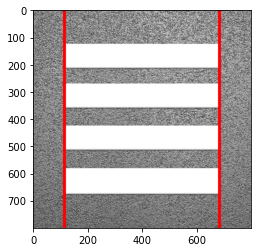

In [192]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read in the image
img = cv2.imread('imgs/zebra_3.jpg', cv2.IMREAD_COLOR)

# Convert to Grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Perform Gaussian blur
"""
Adding this blur has significantly helped
"""
blur = cv2.GaussianBlur(gray, (5,5), 0)

# Find edges with Canny Edge Detection
"""
Tweaking the canny parameters was vital to the HoughLines output
"""
edges = cv2.Canny(blur, 200, 410)

plt.imshow(edges)


# Using HoughLinesP ---
"""
We have switched to HoughLinesP so the minLineGap feature which hopefully will
be able to find lines with gaps.

We found that this wasn't actually the case! It was moreso adding a blur and tweaking
out canny params. HoughLines normal serves us better since the lines are infinite.
"""
# linesP = cv2.HoughLinesP(image=edges, 
#                          rho=1, 
#                          theta=np.pi/180, 
#                          threshold=100, 
#                          minLineLength=100, 
#                          maxLineGap=150)
# if linesP is not None:
#     for line in linesP:
#         point1 = (line[0][0], line[0][1])
#         point2 = (line[0][2], line[0][3])
#         cv2.line(img, point1, point2, (0,0,255), 3, cv2.LINE_AA)


# Using Houghlines ---

# Detect lines using Hough Lines Transform
lines = cv2.HoughLines(image=edges, rho=1, theta=np.pi/180, threshold=100)

if lines is not None:
    for line in lines:
        rho = line[0][0] # Extract the line's rho (distance from 0,0)
        theta = line[0][1] # Extract the line's theta (rotation angle in radians) 

        # Only add lines that are less than 90 degrees
        if theta < 1.5:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a * rho
            y0 = b * rho
            x1 = int(x0 + 1000 * (-b))
            y1 = int(y0 + 1000 * (a))
            x2 = int(x0 - 1000 * (-b))
            y2 = int(y0 - 1000 * (a))
            point1 = (x1, y1)
            point2 = (x2, y2)
            # Draw lines between points
            cv2.line(img, point1, point2, (255,0,0), 10)

    # Display the lines on the image
    plt.imshow(img)
else:
    print("No lines")